# K-Means를 이용한 붓꽃(iris) 데이터 셋 clustering

In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

iris = load_iris()

iris_DF = pd.DataFrame(data = iris.data,
                       columns = ['sepal_length','sepal_width',
                                  'petal_length','petal_width'])
iris_DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
# KMeans 객체를 생성하고 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_DF)

KMeans(n_clusters=3, random_state=0)

labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점확인하고 iris_DF에 cluster컬럼으로 추가

In [23]:
print(kmeans.labels_)
print(kmeans.predict(iris_DF))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [24]:
iris_DF['cluster']=kmeans.labels_

In [25]:
iris_DF['target']=iris.target
iris_result=iris_DF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
print(pca_transformed)
iris_DF['pca_x'] = pca_transformed[:, 0]
iris_DF['pca_y'] = pca_transformed[:, 1]
print(iris_DF.head(3))

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

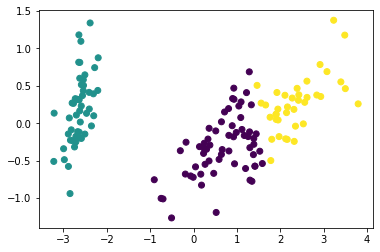

In [28]:
plt.scatter(x=iris_DF.loc[:, 'pca_x'], y=iris_DF.loc[:,'pca_y'],c=iris_DF['cluster'])

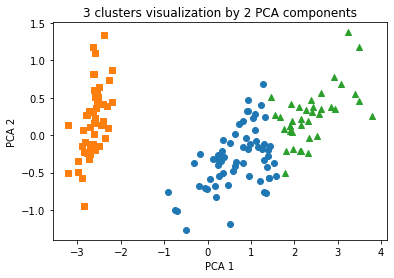

In [30]:
# cluster 값이 0,1,2 인 경우마다 별도의 index로 추출
marker0_ind = iris_DF[iris_DF['cluster']==0].index
marker1_ind = iris_DF[iris_DF['cluster']==1].index
marker2_ind = iris_DF[iris_DF['cluster']==2].index

# cluster 값 0,1,2에 해당하는 index로 각 cluster 레벨의 pca_x, pca_y 값 추출
plt.scatter(x=iris_DF.loc[marker0_ind, 'pca_x'], y=iris_DF.loc[marker0_ind, 'pca_y'],
           marker='o')
plt.scatter(x=iris_DF.loc[marker1_ind, 'pca_x'], y=iris_DF.loc[marker1_ind, 'pca_y'],
           marker='s')
plt.scatter(x=iris_DF.loc[marker2_ind, 'pca_x'], y=iris_DF.loc[marker2_ind, 'pca_y'],
           marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 PCA components')
plt.show()

# Clustering 알고리즘 테스트를 위한 데이터 생성

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers = 3,
                 cluster_std = 0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [34]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


make_blob()으로 만들어진 데이터 포인트들을 시각화

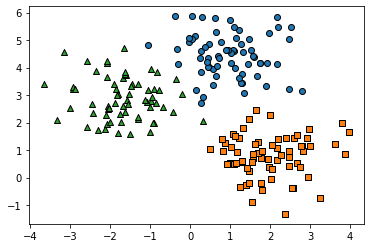

In [37]:
target_list=np.unique(y)
markers=['o','s','^','P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot 을 marker 별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], 
                edgecolor='k', marker=markers[target])
plt.show()
    

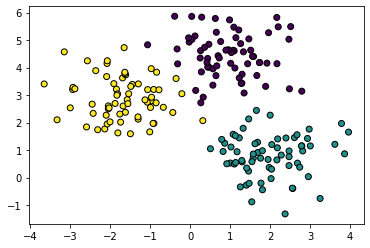

In [38]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y)

K-meanns 클러스터링을 수ㅜ행하고 개별 클러스터의 중심 위치를 시각화

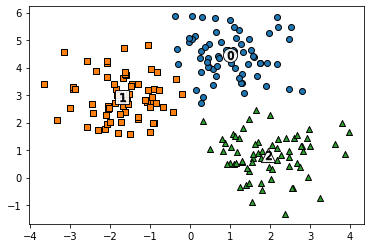

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
# cluster_center_는 개별 클러스터의 중심위치 좌표 시각화를 위해추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

# 군집된 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
               marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,
            edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', alpha=0.9,
            edgecolor='k', marker='$%d$' % label)
plt.show()


In [42]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [43]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
